In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
warnings.filterwarnings('ignore')
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer
warnings.filterwarnings("ignore", category=DeprecationWarning)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is alr

In [4]:
data = pd.read_csv('Resume.csv')
data

,Resumes,Category
0,\nNaveen Sadhu\n\n\nTitle: software developer\...,React JS Developer Resume
1,\nSUSOVAN BAG \nSeeking a challenging ...,React JS Developer Resume
2,\nUi-Developer/ React JS Developer \nNAME: KRI...,React JS Developer Resume
3,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n \n...,React JS Developer Resume
4,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer Resume
5,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer Resume
6,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume
7,\nPage | 1 \n Name: M. Prabakaran \nTitle...,React JS Developer Resume
8,Name: Ravali P \n\n ...,React JS Developer Resume
9,Venkatalakshmi Pedireddy\nSoftware Developer\n...,React JS Developer Resume


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   53 non-null     object
 1   Category  53 non-null     object
dtypes: object(2)
memory usage: 976.0+ bytes


In [6]:
data.isnull().sum()

Resumes     0
Category    0
dtype: int64

In [7]:
data.duplicated().sum()

0

# Checking unnecessary words in the Data

In [8]:
data.Resumes.str.contains('https://').value_counts() / len(data)

False    0.924528
True     0.075472
Name: Resumes, dtype: float64

In [9]:
data.Resumes.str.contains('@').value_counts() / len(data)

False    0.943396
True     0.056604
Name: Resumes, dtype: float64

In [10]:
print('Total Resumes this period:', len(data.index), '\n')

Total Resumes this period: 53 



[Text(0, 0, 'aripriyabattini@gmai.com'),
 Text(1, 0, 'project'),
 Text(2, 0, 'harukabdul786@gmail.com')]

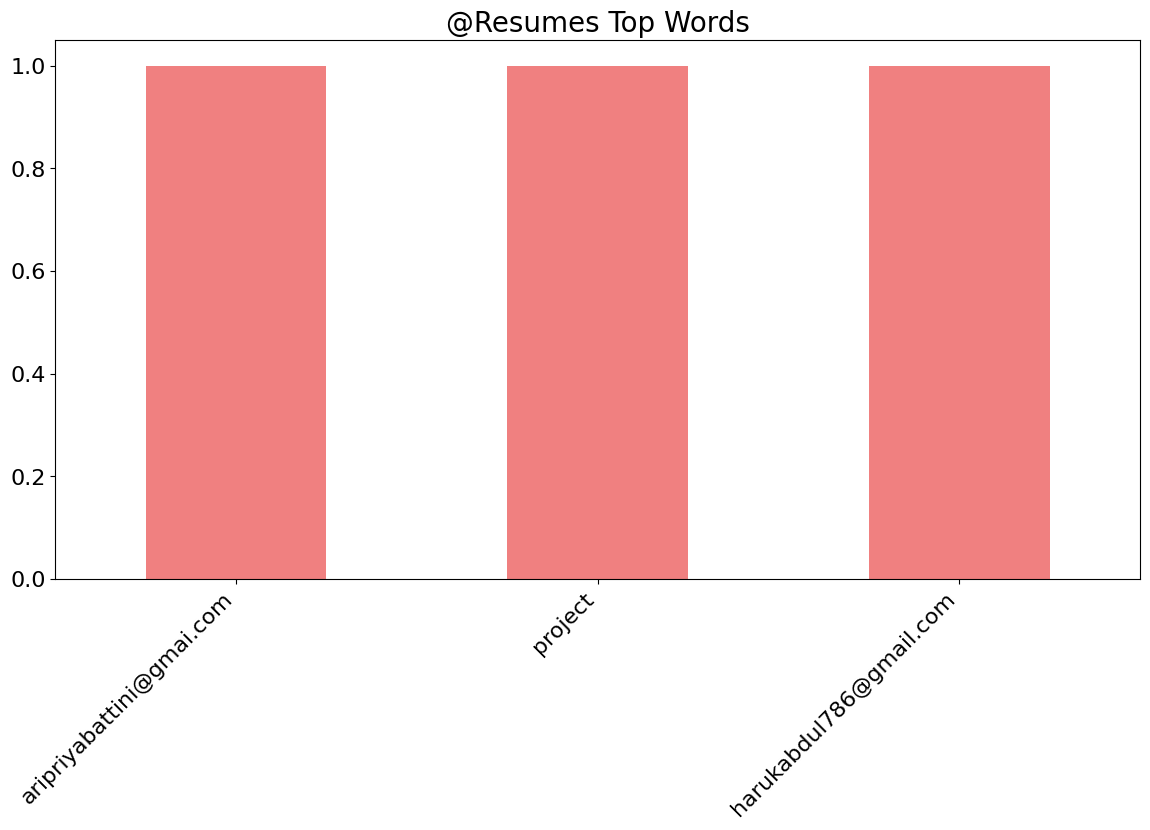

In [11]:
import itertools

c = list(
itertools.chain(
    *data.Resumes.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                            if '@' in handle.replace(":", "")]).tolist())
)

pd.Series(c).value_counts().head(20).plot.bar(
    figsize=(14, 7), fontsize=16, color='lightcoral'
)
plt.gca().set_title('@Resumes Top Words', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)

In [12]:
from nltk import word_tokenize
tokens = data.Resumes.map(word_tokenize)

In [13]:
data=[Text.strip() for Text in data.Resumes] # remove both the leading and the trailing characters
data=[Text for Text in data if Text] # removes empty strings, because they are considered in Python as False
data[0:10]

['Naveen Sadhu\n\n\nTitle: software developer\t\t\t\t                  \nLocation: Hyderabad, India\t\t\t                                \n\nProfessional Summary\n1 year of overall IT experience in Html, Sql, Reactjs and Nodejs.\nExperience in working with Application development and testing tool\nHard working and enthusiastic.\nExcellent communication, interpersonal, analytical skills, and strong ability to perform as part of team.\nExceptional ability to learn new concepts.\n\nEducation\nBachelor of Technology in Computer Science and Engineering from Marri Laxman Reddy Institute of Technology and Management (Affiliated to JNTUH).\nSkills\n\nProfessional Experience\nCurrent Project \nClient\t\t  : Inline4, USA\n\nOrganization     : Edvenswa tech Pvt. Ltd\n\nTechnology\t  : MERN stack, HTML,CSS,BOOTSTRAP\n\nDescription\n\nThe project goal is to provide whenever the user wants to do servicing for his bike he can go directly to this application and he can book slot for his bike servicing

In [14]:
review_text=' '.join(data)
review_text[:1000]

'Naveen Sadhu\n\n\nTitle: software developer\t\t\t\t                  \nLocation: Hyderabad, India\t\t\t                                \n\nProfessional Summary\n1 year of overall IT experience in Html, Sql, Reactjs and Nodejs.\nExperience in working with Application development and testing tool\nHard working and enthusiastic.\nExcellent communication, interpersonal, analytical skills, and strong ability to perform as part of team.\nExceptional ability to learn new concepts.\n\nEducation\nBachelor of Technology in Computer Science and Engineering from Marri Laxman Reddy Institute of Technology and Management (Affiliated to JNTUH).\nSkills\n\nProfessional Experience\nCurrent Project \nClient\t\t  : Inline4, USA\n\nOrganization     : Edvenswa tech Pvt. Ltd\n\nTechnology\t  : MERN stack, HTML,CSS,BOOTSTRAP\n\nDescription\n\nThe project goal is to provide whenever the user wants to do servicing for his bike he can go directly to this application and he can book slot for his bike servicing.

In [15]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
review_tokens=tknzr.tokenize(review_text)
print(review_tokens[:100])

['Naveen', 'Sadhu', 'Title', ':', 'software', 'developer', 'Location', ':', 'Hyderabad', ',', 'India', 'Professional', 'Summary', '1', 'year', 'of', 'overall', 'IT', 'experience', 'in', 'Html', ',', 'Sql', ',', 'Reactjs', 'and', 'Nodejs', '.', 'Experience', 'in', 'working', 'with', 'Application', 'development', 'and', 'testing', 'tool', 'Hard', 'working', 'and', 'enthusiastic', '.', 'Excellent', 'communication', ',', 'interpersonal', ',', 'analytical', 'skills', ',', 'and', 'strong', 'ability', 'to', 'perform', 'as', 'part', 'of', 'team', '.', 'Exceptional', 'ability', 'to', 'learn', 'new', 'concepts', '.', 'Education', 'Bachelor', 'of', 'Technology', 'in', 'Computer', 'Science', 'and', 'Engineering', 'from', 'Marri', 'Laxman', 'Reddy', 'Institute', 'of', 'Technology', 'and', 'Management', '(', 'Affiliated', 'to', 'JNTUH', ')', '.', 'Skills', 'Professional', 'Experience', 'Current', 'Project', 'Client', ':', 'Inline', '4']


In [16]:
review_tokens_text=' '.join(review_tokens)
review_tokens_text[:1000]

'Naveen Sadhu Title : software developer Location : Hyderabad , India Professional Summary 1 year of overall IT experience in Html , Sql , Reactjs and Nodejs . Experience in working with Application development and testing tool Hard working and enthusiastic . Excellent communication , interpersonal , analytical skills , and strong ability to perform as part of team . Exceptional ability to learn new concepts . Education Bachelor of Technology in Computer Science and Engineering from Marri Laxman Reddy Institute of Technology and Management ( Affiliated to JNTUH ) . Skills Professional Experience Current Project Client : Inline 4 , USA Organization : Edvenswa tech Pvt . Ltd Technology : MERN stack , HTML , CSS , BOOTSTRAP Description The project goal is to provide whenever the user wants to do servicing for his bike he can go directly to this application and he can book slot for his bike servicing . Why because whenever the customer is in problem he can directly book the service so that

# Remove Punctuation From Text


In [17]:
no_punc_text=review_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'Naveen Sadhu Title  software developer Location  Hyderabad  India Professional Summary 1 year of overall IT experience in Html  Sql  Reactjs and Nodejs  Experience in working with Application development and testing tool Hard working and enthusiastic  Excellent communication  interpersonal  analytical skills  and strong ability to perform as part of team  Exceptional ability to learn new concepts  Education Bachelor of Technology in Computer Science and Engineering from Marri Laxman Reddy Institute of Technology and Management  Affiliated to JNTUH   Skills Professional Experience Current Project Client  Inline 4  USA Organization  Edvenswa tech Pvt  Ltd Technology  MERN stack  HTML  CSS  BOOTSTRAP Description The project goal is to provide whenever the user wants to do servicing for his bike he can go directly to this application and he can book slot for his bike servicing  Why because whenever the customer is in problem he can directly book the service so that the service provider wi

# Remove URL's from Text

In [18]:
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:1000]

'Naveen Sadhu Title  software developer Location  Hyderabad  India Professional Summary 1 year of overall IT experience in Html  Sql  Reactjs and Nodejs  Experience in working with Application development and testing tool Hard working and enthusiastic  Excellent communication  interpersonal  analytical skills  and strong ability to perform as part of team  Exceptional ability to learn new concepts  Education Bachelor of Technology in Computer Science and Engineering from Marri Laxman Reddy Institute of Technology and Management  Affiliated to JNTUH   Skills Professional Experience Current Project Client  Inline 4  USA Organization  Edvenswa tech Pvt  Ltd Technology  MERN stack  HTML  CSS  BOOTSTRAP Description The project goal is to provide whenever the user wants to do servicing for his bike he can go directly to this application and he can book slot for his bike servicing  Why because whenever the customer is in problem he can directly book the service so that the service provider wi

# Apply Tokenization on 100 Words


In [19]:
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens[:100])

['Naveen', 'Sadhu', 'Title', 'software', 'developer', 'Location', 'Hyderabad', 'India', 'Professional', 'Summary', '1', 'year', 'of', 'overall', 'IT', 'experience', 'in', 'Html', 'Sql', 'Reactjs', 'and', 'Nodejs', 'Experience', 'in', 'working', 'with', 'Application', 'development', 'and', 'testing', 'tool', 'Hard', 'working', 'and', 'enthusiastic', 'Excellent', 'communication', 'interpersonal', 'analytical', 'skills', 'and', 'strong', 'ability', 'to', 'perform', 'as', 'part', 'of', 'team', 'Exceptional', 'ability', 'to', 'learn', 'new', 'concepts', 'Education', 'Bachelor', 'of', 'Technology', 'in', 'Computer', 'Science', 'and', 'Engineering', 'from', 'Marri', 'Laxman', 'Reddy', 'Institute', 'of', 'Technology', 'and', 'Management', 'Affiliated', 'to', 'JNTUH', 'Skills', 'Professional', 'Experience', 'Current', 'Project', 'Client', 'Inline', '4', 'USA', 'Organization', 'Edvenswa', 'tech', 'Pvt', 'Ltd', 'Technology', 'MERN', 'stack', 'HTML', 'CSS', 'BOOTSTRAP', 'Description', 'The', 'proj

In [20]:
len(text_tokens)

28640

# Removing Stopwords

In [21]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['Naveen', 'Sadhu', 'Title', 'software', 'developer', 'Location', 'Hyderabad', 'India', 'Professional', 'Summary', '1', 'year', 'overall', 'IT', 'experience', 'Html', 'Sql', 'Reactjs', 'Nodejs', 'Experience', 'working', 'Application', 'development', 'testing', 'tool', 'Hard', 'working', 'enthusiastic', 'Excellent', 'communication', 'interpersonal', 'analytical', 'skills', 'strong', 'ability', 'perform', 'part', 'team', 'Exceptional', 'ability', 'learn', 'new', 'concepts', 'Education', 'Bachelor', 'Technology', 'Computer', 'Science', 'Engineering', 'Marri', 'Laxman', 'Reddy', 'Institute', 'Technology', 'Management', 'Affiliated', 'JNTUH', 'Skills', 'Professional', 'Experience', 'Current', 'Project', 'Client', 'Inline', '4', 'USA', 'Organization', 'Edvenswa', 'tech', 'Pvt', 'Ltd', 'Technology', 'MERN', 'stack', 'HTML', 'CSS', 'BOOTSTRAP', 'Description', 'The', 'project', 'goal', 'provide', 'whenever', 'user', 'wants', 'servicing', 'bike', 'go', 'directly', 'application', 'book', 'slot', 

In [22]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])

['naveen', 'sadhu', 'title', 'software', 'developer', 'location', 'hyderabad', 'india', 'professional', 'summary', '1', 'year', 'overall', 'it', 'experience', 'html', 'sql', 'reactjs', 'nodejs', 'experience', 'working', 'application', 'development', 'testing', 'tool', 'hard', 'working', 'enthusiastic', 'excellent', 'communication', 'interpersonal', 'analytical', 'skills', 'strong', 'ability', 'perform', 'part', 'team', 'exceptional', 'ability', 'learn', 'new', 'concepts', 'education', 'bachelor', 'technology', 'computer', 'science', 'engineering', 'marri', 'laxman', 'reddy', 'institute', 'technology', 'management', 'affiliated', 'jntuh', 'skills', 'professional', 'experience', 'current', 'project', 'client', 'inline', '4', 'usa', 'organization', 'edvenswa', 'tech', 'pvt', 'ltd', 'technology', 'mern', 'stack', 'html', 'css', 'bootstrap', 'description', 'the', 'project', 'goal', 'provide', 'whenever', 'user', 'wants', 'servicing', 'bike', 'go', 'directly', 'application', 'book', 'slot', 

# Applying Stemming

In [23]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['naveen', 'sadhu', 'titl', 'softwar', 'develop', 'locat', 'hyderabad', 'india', 'profession', 'summari', '1', 'year', 'overal', 'it', 'experi', 'html', 'sql', 'reactj', 'nodej', 'experi', 'work', 'applic', 'develop', 'test', 'tool', 'hard', 'work', 'enthusiast', 'excel', 'commun', 'interperson', 'analyt', 'skill', 'strong', 'abil', 'perform', 'part', 'team', 'except', 'abil', 'learn', 'new', 'concept', 'educ', 'bachelor', 'technolog', 'comput', 'scienc', 'engin', 'marri', 'laxman', 'reddi', 'institut', 'technolog', 'manag', 'affili', 'jntuh', 'skill', 'profession', 'experi', 'current', 'project', 'client', 'inlin', '4', 'usa', 'organ', 'edvenswa', 'tech', 'pvt', 'ltd', 'technolog', 'mern', 'stack', 'html', 'css', 'bootstrap', 'descript', 'the', 'project', 'goal', 'provid', 'whenev', 'user', 'want', 'servic', 'bike', 'go', 'directli', 'applic', 'book', 'slot', 'bike', 'servic', 'whi', 'whenev', 'custom', 'problem', 'directli', 'book']


In [24]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[:100])

naveen sadhu title software developer location hyderabad india professional summary 1 year overall it experience html sql reactjs nodejs experience working application development testing tool hard working enthusiastic excellent communication interpersonal analytical skills strong ability perform part team exceptional ability learn new concepts education bachelor technology computer science engineering marri laxman reddy institute technology management affiliated jntuh skills professional experience current project client inline 4 usa organization edvenswa tech pvt ltd technology mern stack html css bootstrap description the project goal provide whenever user wants servicing bike go directly application book slot bike servicing why whenever customer problem directly book


# Applying Lemmatization

In [25]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['naveen', 'sadhu', 'title', 'software', 'developer', 'location', 'hyderabad', 'india', 'professional', 'summary', '1', 'year', 'overall', 'it', 'experience', 'html', 'sql', 'reactjs', 'nodejs', 'experience', 'work', 'application', 'development', 'testing', 'tool', 'hard', 'work', 'enthusiastic', 'excellent', 'communication', 'interpersonal', 'analytical', 'skill', 'strong', 'ability', 'perform', 'part', 'team', 'exceptional', 'ability', 'learn', 'new', 'concept', 'education', 'bachelor', 'technology', 'computer', 'science', 'engineering', 'marri', 'laxman', 'reddy', 'institute', 'technology', 'management', 'affiliate', 'jntuh', 'skill', 'professional', 'experience', 'current', 'project', 'client', 'inline', '4', 'usa', 'organization', 'edvenswa', 'tech', 'pvt', 'ltd', 'technology', 'mern', 'stack', 'html', 'css', 'bootstrap', 'description', 'the', 'project', 'goal', 'provide', 'whenever', 'user', 'want', 'servicing', 'bike', 'go', 'directly', 'application', 'book', 'slot', 'bike', 'se

In [26]:
clean_review=' '.join(lemmas)
clean_review[:1000]

'naveen sadhu title software developer location hyderabad india professional summary 1 year overall it experience html sql reactjs nodejs experience work application development testing tool hard work enthusiastic excellent communication interpersonal analytical skill strong ability perform part team exceptional ability learn new concept education bachelor technology computer science engineering marri laxman reddy institute technology management affiliate jntuh skill professional experience current project client inline 4 usa organization edvenswa tech pvt ltd technology mern stack html css bootstrap description the project goal provide whenever user want servicing bike go directly application book slot bike servicing why whenever customer problem directly book service service provider take bike servicing contribution understand implement feature negotiate scope resolve conflict priority translate requirement meaningful story team deliver application deployment develop optimize code pe

# Applying Text Processing On DataFrame

In [27]:
data = pd.read_csv("Resume.csv")

In [28]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

# Converting Into Clean Resumes


In [29]:
data['Clean_Resumes'] = np.vectorize(remove_pattern)(data['Resumes'], "@[\w]*")
data.head(10)

,Resumes,Category,Clean_Resumes
0,\nNaveen Sadhu\n\n\nTitle: software developer\...,React JS Developer Resume,\nNaveen Sadhu\n\n\nTitle: software developer\...
1,\nSUSOVAN BAG \nSeeking a challenging ...,React JS Developer Resume,\nSUSOVAN BAG \nSeeking a challenging ...
2,\nUi-Developer/ React JS Developer \nNAME: KRI...,React JS Developer Resume,\nUi-Developer/ React JS Developer \nNAME: KRI...
3,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n \n...,React JS Developer Resume,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n \n...
4,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer Resume,HARIPRIYA BATTINA \nExperience as UI Developer...
5,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer Resume,KAMALAKAR REDDY. A \nLinked In: https://www.li...
6,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...
7,\nPage | 1 \n Name: M. Prabakaran \nTitle...,React JS Developer Resume,\nPage | 1 \n Name: M. Prabakaran \nTitle...
8,Name: Ravali P \n\n ...,React JS Developer Resume,Name: Ravali P \n\n ...
9,Venkatalakshmi Pedireddy\nSoftware Developer\n...,React JS Developer Resume,Venkatalakshmi Pedireddy\nSoftware Developer\n...


# Remove Url from Clean_Resumes

In [30]:
clean_Resumes = []

for index, row in data.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Resumes.split() if 'http' not in word]
    clean_Resumes.append(' '.join(words_without_links))

data['Clean_Resumes'] = clean_Resumes
data.head(10)

,Resumes,Category,Clean_Resumes
0,\nNaveen Sadhu\n\n\nTitle: software developer\...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
1,\nSUSOVAN BAG \nSeeking a challenging ...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,\nUi-Developer/ React JS Developer \nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...
3,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n \n...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
4,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
5,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer Resume,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...
6,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
7,\nPage | 1 \n Name: M. Prabakaran \nTitle...,React JS Developer Resume,Page | 1 Name: M. Prabakaran Title: UI Develop...
8,Name: Ravali P \n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
9,Venkatalakshmi Pedireddy\nSoftware Developer\n...,React JS Developer Resume,Venkatalakshmi Pedireddy Software Developer Ex...


# Remove '!' from Clean_Resumes


In [31]:
data = data[data['Clean_Resumes']!='']
data.head(10)

,Resumes,Category,Clean_Resumes
0,\nNaveen Sadhu\n\n\nTitle: software developer\...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
1,\nSUSOVAN BAG \nSeeking a challenging ...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,\nUi-Developer/ React JS Developer \nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...
3,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n \n...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
4,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
5,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer Resume,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...
6,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
7,\nPage | 1 \n Name: M. Prabakaran \nTitle...,React JS Developer Resume,Page | 1 Name: M. Prabakaran Title: UI Develop...
8,Name: Ravali P \n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
9,Venkatalakshmi Pedireddy\nSoftware Developer\n...,React JS Developer Resume,Venkatalakshmi Pedireddy Software Developer Ex...


# Removing Duplicate Resumes


In [32]:
data.drop_duplicates(subset=['Clean_Resumes'], keep=False)
data.head(10)

,Resumes,Category,Clean_Resumes
0,\nNaveen Sadhu\n\n\nTitle: software developer\...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
1,\nSUSOVAN BAG \nSeeking a challenging ...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,\nUi-Developer/ React JS Developer \nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...
3,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n \n...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
4,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
5,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer Resume,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...
6,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
7,\nPage | 1 \n Name: M. Prabakaran \nTitle...,React JS Developer Resume,Page | 1 Name: M. Prabakaran Title: UI Develop...
8,Name: Ravali P \n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
9,Venkatalakshmi Pedireddy\nSoftware Developer\n...,React JS Developer Resume,Venkatalakshmi Pedireddy Software Developer Ex...


In [33]:
data = data.reset_index(drop=True)
data.head(10)

,Resumes,Category,Clean_Resumes
0,\nNaveen Sadhu\n\n\nTitle: software developer\...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
1,\nSUSOVAN BAG \nSeeking a challenging ...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,\nUi-Developer/ React JS Developer \nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...
3,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n \n...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
4,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
5,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer Resume,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...
6,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
7,\nPage | 1 \n Name: M. Prabakaran \nTitle...,React JS Developer Resume,Page | 1 Name: M. Prabakaran Title: UI Develop...
8,Name: Ravali P \n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
9,Venkatalakshmi Pedireddy\nSoftware Developer\n...,React JS Developer Resume,Venkatalakshmi Pedireddy Software Developer Ex...


#Cleaning Words From Text


In [34]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('!', '',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('⇨', '',text)
    text = re.sub(':', '',text)
    text = re.sub('•', '',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [35]:
data['Clean_Resumes'] = data['Clean_Resumes'].apply(lambda x: clean_text(x))
data.head(10)

,Resumes,Category,Clean_Resumes
0,\nNaveen Sadhu\n\n\nTitle: software developer\...,React JS Developer Resume,naveen sadhu title software developer location...
1,\nSUSOVAN BAG \nSeeking a challenging ...,React JS Developer Resume,susovan bag seeking a challenging position in ...
2,\nUi-Developer/ React JS Developer \nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...
3,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n \n...,React JS Developer Resume,md khizaruddin rauf experience currently work...
4,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer Resume,haripriya battina experience as ui developer i...
5,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer Resume,kamalakar reddy a linked in professional summa...
6,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,mareedu lokesh babu professional overview arou...
7,\nPage | 1 \n Name: M. Prabakaran \nTitle...,React JS Developer Resume,page name m prabakaran title ui developer pr...
8,Name: Ravali P \n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...
9,Venkatalakshmi Pedireddy\nSoftware Developer\n...,React JS Developer Resume,venkatalakshmi pedireddy software developer ex...


# Removing Emoji from Clean_Resumes


In [36]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [37]:
data['Clean_Resumes']=data['Clean_Resumes'].apply(lambda x: remove_emoji(x))
data.head(10)

,Resumes,Category,Clean_Resumes
0,\nNaveen Sadhu\n\n\nTitle: software developer\...,React JS Developer Resume,naveen sadhu title software developer location...
1,\nSUSOVAN BAG \nSeeking a challenging ...,React JS Developer Resume,susovan bag seeking a challenging position in ...
2,\nUi-Developer/ React JS Developer \nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...
3,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n \n...,React JS Developer Resume,md khizaruddin rauf experience currently work...
4,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer Resume,haripriya battina experience as ui developer i...
5,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer Resume,kamalakar reddy a linked in professional summa...
6,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,mareedu lokesh babu professional overview arou...
7,\nPage | 1 \n Name: M. Prabakaran \nTitle...,React JS Developer Resume,page name m prabakaran title ui developer pr...
8,Name: Ravali P \n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...
9,Venkatalakshmi Pedireddy\nSoftware Developer\n...,React JS Developer Resume,venkatalakshmi pedireddy software developer ex...


# Applying Tokenization On Clean_Resumes


In [38]:
data['Tokenized_Resumes'] = data['Clean_Resumes'].apply(lambda x: nltk.word_tokenize(x))
data.head(10)

,Resumes,Category,Clean_Resumes,Tokenized_Resumes
0,\nNaveen Sadhu\n\n\nTitle: software developer\...,React JS Developer Resume,naveen sadhu title software developer location...,"[naveen, sadhu, title, software, developer, lo..."
1,\nSUSOVAN BAG \nSeeking a challenging ...,React JS Developer Resume,susovan bag seeking a challenging position in ...,"[susovan, bag, seeking, a, challenging, positi..."
2,\nUi-Developer/ React JS Developer \nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...,"[uideveloper, react, js, developer, name, kris..."
3,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n \n...,React JS Developer Resume,md khizaruddin rauf experience currently work...,"[md, khizaruddin, rauf, experience, currently,..."
4,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer Resume,haripriya battina experience as ui developer i...,"[haripriya, battina, experience, as, ui, devel..."
5,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer Resume,kamalakar reddy a linked in professional summa...,"[kamalakar, reddy, a, linked, in, professional..."
6,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,"[mareedu, lokesh, babu, professional, overview..."
7,\nPage | 1 \n Name: M. Prabakaran \nTitle...,React JS Developer Resume,page name m prabakaran title ui developer pr...,"[page, name, m, prabakaran, title, ui, develop..."
8,Name: Ravali P \n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...,"[name, ravali, p, curriculum, vitae, specializ..."
9,Venkatalakshmi Pedireddy\nSoftware Developer\n...,React JS Developer Resume,venkatalakshmi pedireddy software developer ex...,"[venkatalakshmi, pedireddy, software, develope..."


In [39]:
data.drop(['Tokenized_Resumes'],axis=1,inplace=True)

# Removing stop words from Clean_Resumes and Making it Absolutely_Clean_Resumes

In [40]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

cleaned_resumes = []

for index, row in data.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Resumes.split()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_resumes.append(' '.join(words_without_stopwords))

data['Absolute_Clean_Resumes'] = cleaned_resumes
data.head(10)

,Resumes,Category,Clean_Resumes,Absolute_Clean_Resumes
0,\nNaveen Sadhu\n\n\nTitle: software developer\...,React JS Developer Resume,naveen sadhu title software developer location...,naveen sadhu title software developer location...
1,\nSUSOVAN BAG \nSeeking a challenging ...,React JS Developer Resume,susovan bag seeking a challenging position in ...,susovan bag seeking a challenging position in ...
2,\nUi-Developer/ React JS Developer \nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...
3,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n \n...,React JS Developer Resume,md khizaruddin rauf experience currently work...,md khizaruddin rauf experience currently worki...
4,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer Resume,haripriya battina experience as ui developer i...,haripriya battina experience as ui developer i...
5,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer Resume,kamalakar reddy a linked in professional summa...,kamalakar reddy a linked in professional summa...
6,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,mareedu lokesh babu professional overview arou...
7,\nPage | 1 \n Name: M. Prabakaran \nTitle...,React JS Developer Resume,page name m prabakaran title ui developer pr...,page name m prabakaran title ui developer prof...
8,Name: Ravali P \n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
9,Venkatalakshmi Pedireddy\nSoftware Developer\n...,React JS Developer Resume,venkatalakshmi pedireddy software developer ex...,venkatalakshmi pedireddy software developer ex...


In [41]:
Tokenized_Resume = data['Absolute_Clean_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head(10)

0    [naveen, sadhu, title, software, developer, lo...
1    [susovan, bag, seeking, a, challenging, positi...
2    [uideveloper, react, js, developer, name, kris...
3    [md, khizaruddin, rauf, experience, currently,...
4    [haripriya, battina, experience, as, ui, devel...
5    [kamalakar, reddy, a, linked, in, professional...
6    [mareedu, lokesh, babu, professional, overview...
7    [page, name, m, prabakaran, title, ui, develop...
8    [name, ravali, p, curriculum, vitae, specializ...
9    [venkatalakshmi, pedireddy, software, develope...
Name: Absolute_Clean_Resumes, dtype: object

# Applying Lemmatization on Abosulte_Clean_Resumes


In [42]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

Tokenized_Resumes = Tokenized_Resume.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Resumes.head(10)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0    [naveen, sadhu, title, software, developer, lo...
1    [susovan, bag, seeking, a, challenging, positi...
2    [uideveloper, react, j, developer, name, krish...
3    [md, khizaruddin, rauf, experience, currently,...
4    [haripriya, battina, experience, a, ui, develo...
5    [kamalakar, reddy, a, linked, in, professional...
6    [mareedu, lokesh, babu, professional, overview...
7    [page, name, m, prabakaran, title, ui, develop...
8    [name, ravali, p, curriculum, vitae, specializ...
9    [venkatalakshmi, pedireddy, software, develope...
Name: Absolute_Clean_Resumes, dtype: object

In [43]:
for i, tokens in enumerate(Tokenized_Resume):
    Tokenized_Resume[i] = ' '.join(tokens)

data['Absolute_Clean_Resumes'] = Tokenized_Resume
data.head(10)

,Resumes,Category,Clean_Resumes,Absolute_Clean_Resumes
0,\nNaveen Sadhu\n\n\nTitle: software developer\...,React JS Developer Resume,naveen sadhu title software developer location...,naveen sadhu title software developer location...
1,\nSUSOVAN BAG \nSeeking a challenging ...,React JS Developer Resume,susovan bag seeking a challenging position in ...,susovan bag seeking a challenging position in ...
2,\nUi-Developer/ React JS Developer \nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...
3,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n \n...,React JS Developer Resume,md khizaruddin rauf experience currently work...,md khizaruddin rauf experience currently worki...
4,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer Resume,haripriya battina experience as ui developer i...,haripriya battina experience as ui developer i...
5,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer Resume,kamalakar reddy a linked in professional summa...,kamalakar reddy a linked in professional summa...
6,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,mareedu lokesh babu professional overview arou...
7,\nPage | 1 \n Name: M. Prabakaran \nTitle...,React JS Developer Resume,page name m prabakaran title ui developer pr...,page name m prabakaran title ui developer prof...
8,Name: Ravali P \n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
9,Venkatalakshmi Pedireddy\nSoftware Developer\n...,React JS Developer Resume,venkatalakshmi pedireddy software developer ex...,venkatalakshmi pedireddy software developer ex...


# Applying Count Vectorizer

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
review_cv=cv.fit_transform(lemmas)

In [45]:
print(cv.get_feature_names_out()[100:2000])


['2021' '204' '21' ... 'possess' 'post' 'poster']


In [46]:
print(cv.get_feature_names_out()[:4000])


['006' '01' '012019' ... 'zp' 'ﬁnding' 'ﬁt']


In [47]:
print(review_cv.toarray()[100:2000])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
print(review_cv.toarray().shape)

(22042, 2941)


# Applyong Count vectorizer on NGrams


In [49]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=4000)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [50]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['006' '01' '012019' ... 'zp' 'ﬁnding' 'ﬁt']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
data.drop(['Resumes','Clean_Resumes'],axis=1,inplace=True)

In [52]:
data

,Category,Absolute_Clean_Resumes
0,React JS Developer Resume,naveen sadhu title software developer location...
1,React JS Developer Resume,susovan bag seeking a challenging position in ...
2,React JS Developer Resume,uideveloper react js developer name krishna pr...
3,React JS Developer Resume,md khizaruddin rauf experience currently worki...
4,React JS Developer Resume,haripriya battina experience as ui developer i...
5,React JS Developer Resume,kamalakar reddy a linked in professional summa...
6,React JS Developer Resume,mareedu lokesh babu professional overview arou...
7,React JS Developer Resume,page name m prabakaran title ui developer prof...
8,React JS Developer Resume,name ravali p curriculum vitae specialization ...
9,React JS Developer Resume,venkatalakshmi pedireddy software developer ex...


In [53]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Absolute_Clean_Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 312), ('using', 247), ('workday', 191), ('application', 186), ('project', 167), ('data', 167), ('reports', 162), ('server', 161), ('business', 154), ('sql', 153), ('peoplesoft', 152), ('knowledge', 130), ('web', 119), ('process', 117), ('good', 103), ('skills', 101), ('react', 98), ('involved', 98), ('client', 96), ('system', 96), ('like', 96), ('working', 95), ('various', 95), ('creating', 93), ('worked', 92), ('integrations', 90), ('development', 89), ('support', 89), ('database', 86), ('tools', 84), ('servers', 83), ('js', 82), ('technical', 82), ('developer', 81), ('integration', 81), ('design', 77), ('created', 76), ('hcm', 76), ('used', 74), ('’', 73), ('people', 71), ('report', 71), ('work', 70), ('testing', 69), ('team', 68), ('services', 68), ('responsibilities', 68), ('new', 66), ('role', 63), ('custom', 63), ('date', 63), ('user', 61), ('developed', 61), ('requirement', 61), ('studio', 61), ('security', 60), ('production', 60), ('eib', 60), ('professional', 5

<Figure size 1000x1000 with 0 Axes>

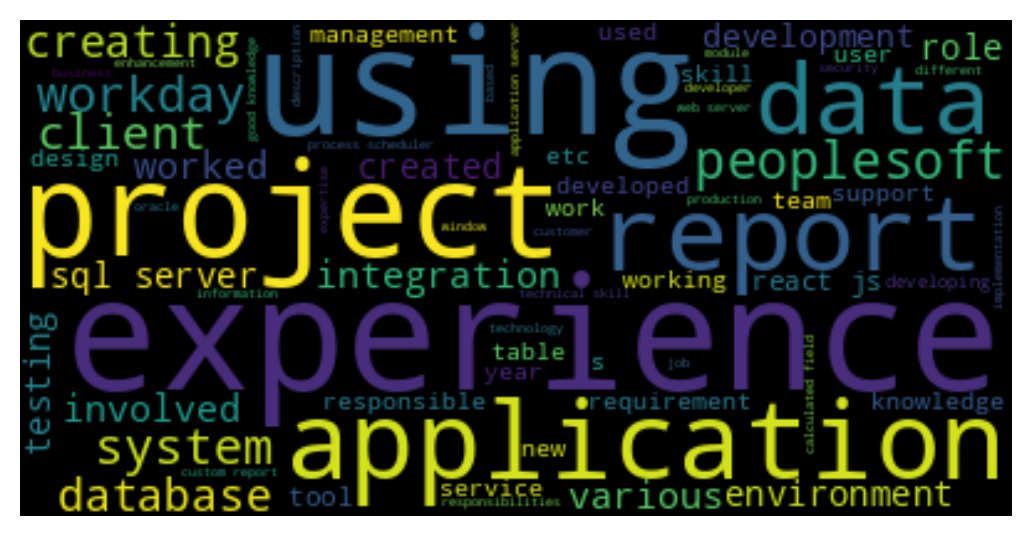

In [54]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.figure(dpi=(200))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
categories = np.sort(data['Category'].unique())
categories

array(['Peoplesoft resumes', 'React JS Developer Resume',
       'SQL Developer Lightning insight', 'workday resumes'], dtype=object)

In [56]:
data_categories = [data[data['Category'] == category].loc[:, ['Absolute_Clean_Resumes', 'Category']] for category in categories]
data_categories

[                               Absolute_Clean_Resumes            Category
 21  having years of experience in peoplesoft appli...  Peoplesoft resumes
 22  c o n t a c t address manyata tech park nagava...  Peoplesoft resumes
 23  murali experience summary i have years of expe...  Peoplesoft resumes
 24  anubhav kumar singh to work in a globally comp...  Peoplesoft resumes
 25  tanna sujatha objective seeking a challenging ...  Peoplesoft resumes
 26  career objective pursuing peoplesoft executive...  Peoplesoft resumes
 27  peoplesoft admin varkala vikas career objectiv...  Peoplesoft resumes
 28  peoplesoft administration vivekanand sayana ca...  Peoplesoft resumes
 29  having years of experience in peoplesoft appli...  Peoplesoft resumes
 30  profile summary i have overall years’ experien...  Peoplesoft resumes,
                                Absolute_Clean_Resumes  \
 0   naveen sadhu title software developer location...   
 1   susovan bag seeking a challenging position in ...   


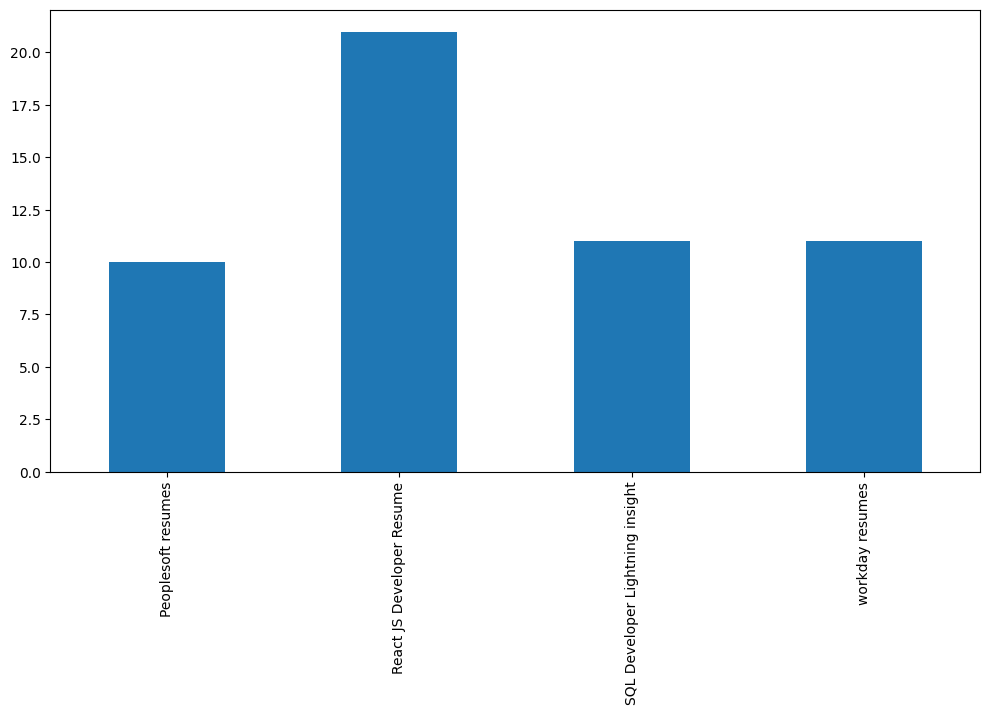

In [57]:
data['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [58]:
def wordcloud(df):
    txt = ' '.join(txt for txt in data['Absolute_Clean_Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

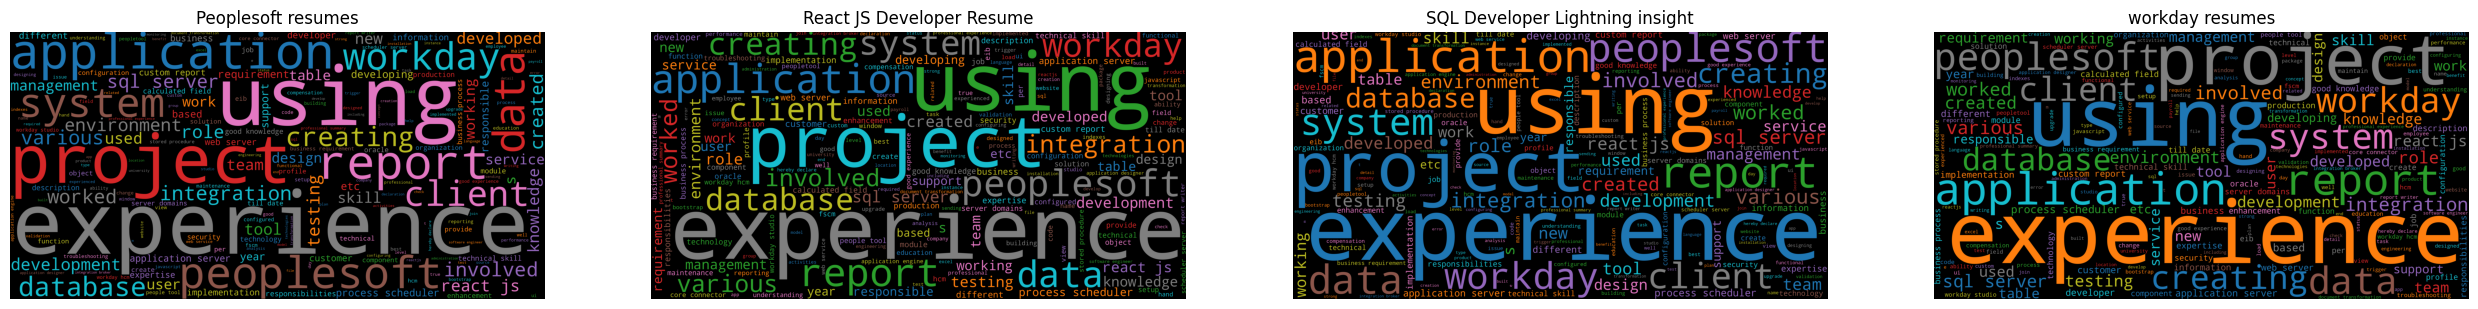

In [59]:
PLOT_PALETTE = 'tableau-colorblind10'

WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline
plt.figure(figsize=(40, 28))

for i, category in enumerate(categories):
    wc = wordcloud(data_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [60]:
def wordfreq(df):
    count = data['Absolute_Clean_Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

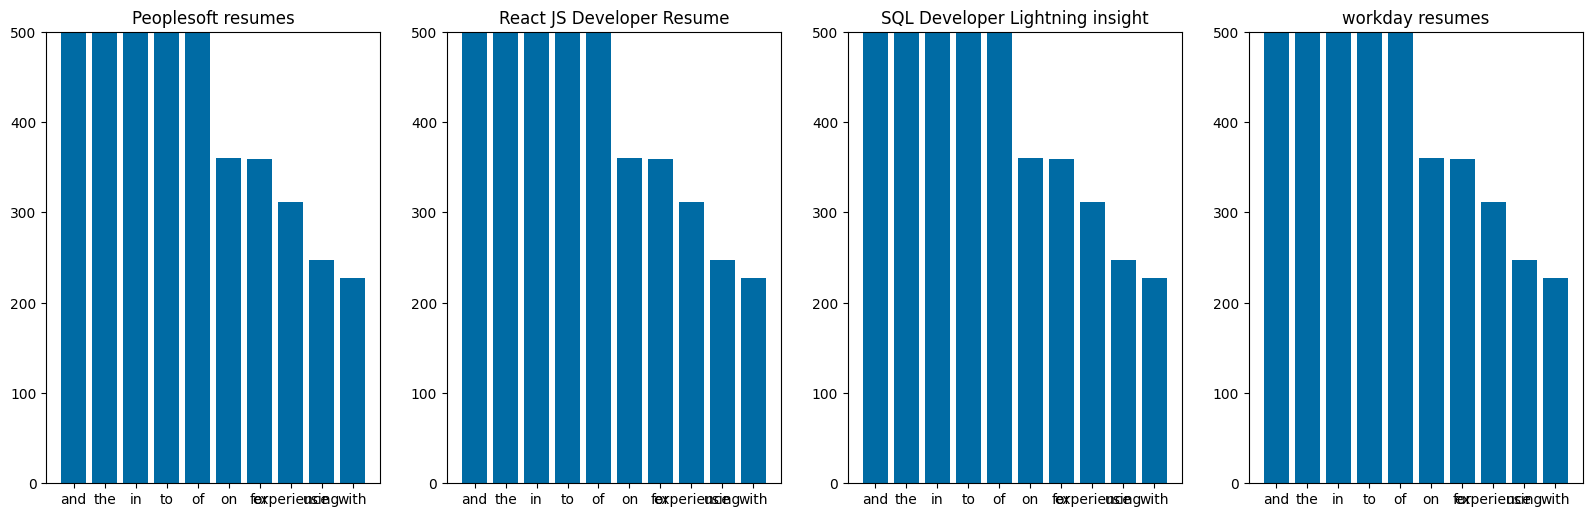

In [61]:
fig = plt.figure(figsize=(25, 34))

for i, category in enumerate(categories):
    wf = wordfreq(data_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)

plt.show()
plt.close()

In [62]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [63]:
data

,Category,Absolute_Clean_Resumes
0,1,naveen sadhu title software developer location...
1,1,susovan bag seeking a challenging position in ...
2,1,uideveloper react js developer name krishna pr...
3,1,md khizaruddin rauf experience currently worki...
4,1,haripriya battina experience as ui developer i...
5,1,kamalakar reddy a linked in professional summa...
6,1,mareedu lokesh babu professional overview arou...
7,1,page name m prabakaran title ui developer prof...
8,1,name ravali p curriculum vitae specialization ...
9,1,venkatalakshmi pedireddy software developer ex...


In [64]:
data.Category.value_counts()

1    21
2    11
3    11
0    10
Name: Category, dtype: int64

<Figure size 10000x10000 with 0 Axes>

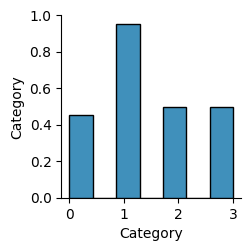

In [65]:
plt.figure(figsize=(20,20),dpi=500)
sns.pairplot(data = data)

<Axes: xlabel='count', ylabel='Category'>

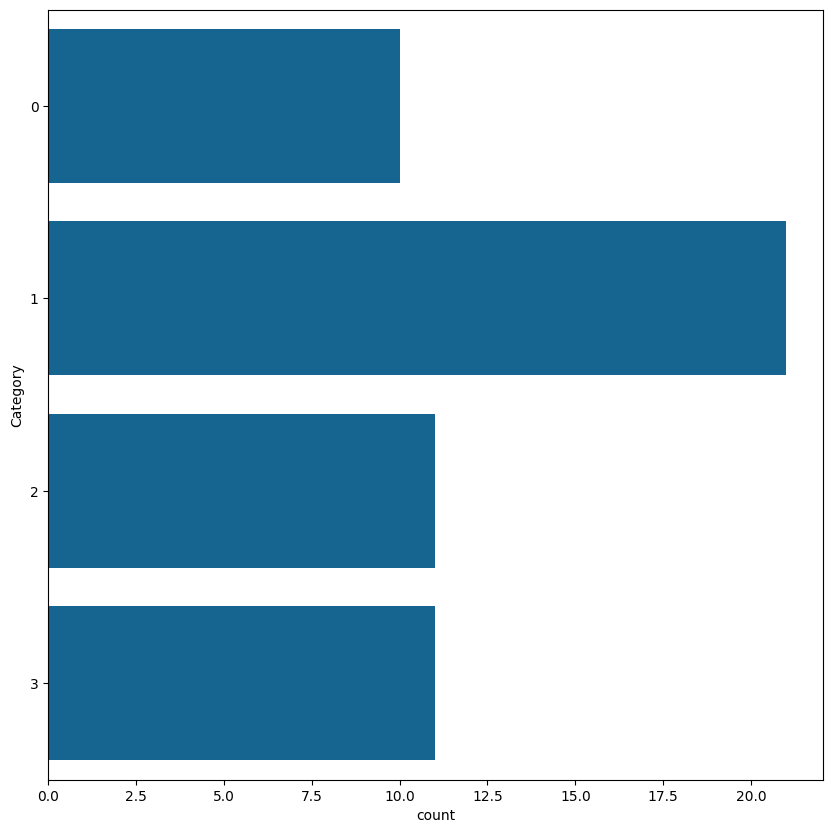

In [66]:
plt.figure(figsize=(10,10))
plt.xticks()
sns.countplot(y="Category", data=data)

In [67]:
targetCounts = data['Category'].value_counts().reset_index()['Category']
targetLabels  = data['Category'].value_counts().reset_index()['index']

In [68]:
targetCounts


0    21
1    11
2    11
3    10
Name: Category, dtype: int64

In [69]:
targetLabels

0    1
1    2
2    3
3    0
Name: index, dtype: int64

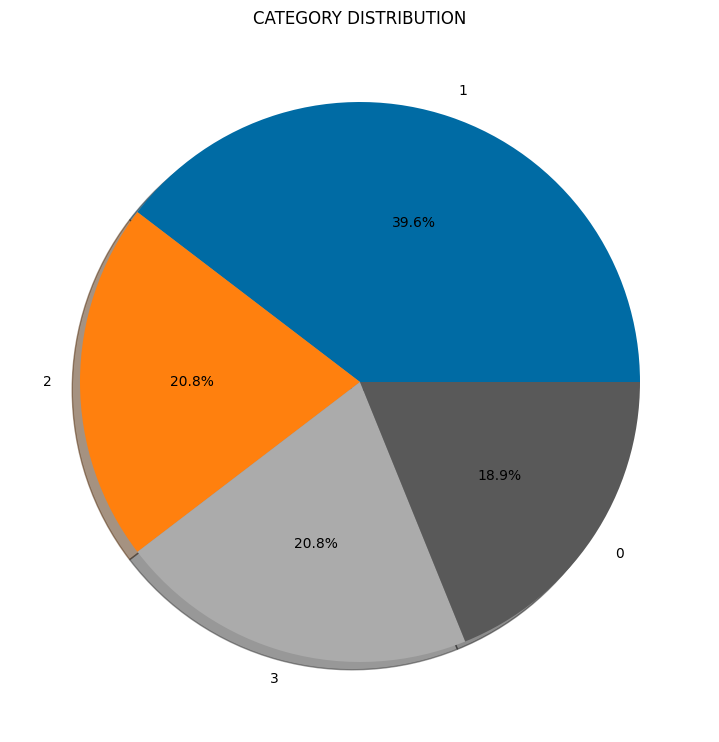

In [70]:
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(20,20))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
requiredText = data['Absolute_Clean_Resumes'].values
requiredTarget = data['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=45, test_size=0.20,stratify=requiredTarget)
X_train.shape, X_test.shape

((42, 3199), (11, 3199))

In [73]:
data['Category']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    2
32    2
33    2
34    2
35    2
36    2
37    2
38    2
39    2
40    2
41    2
42    3
43    3
44    3
45    3
46    3
47    3
48    3
49    3
50    3
51    3
52    3
Name: Category, dtype: int64

# Model Building

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Logistic Regression

In [75]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [76]:
predict1 = lg.predict(X_test)


In [77]:
accuracy_1 = accuracy_score(y_test,predict1)
accuracy_1

0.9090909090909091

In [78]:
cm = confusion_matrix(y_test,predict1)
cm

array([[2, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 2]])

Text(50.722222222222214, 0.5, 'Truth')

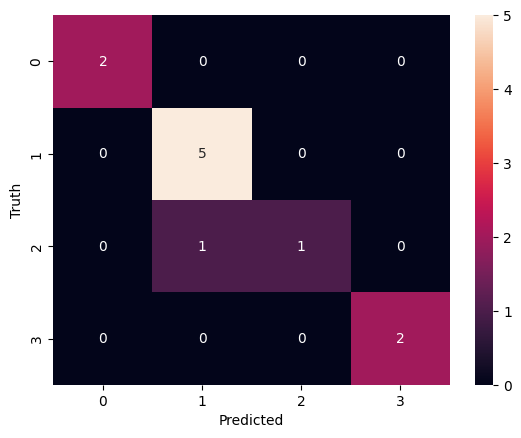

In [79]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [80]:
print(classification_report(y_test,predict1))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.83      1.00      0.91         5
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2

    accuracy                           0.91        11
   macro avg       0.96      0.88      0.89        11
weighted avg       0.92      0.91      0.90        11



In [81]:
accuracy_1 = round(accuracy_score(y_test,predict1),4)
precision_1 = round(precision_score(y_test,predict1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,predict1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,predict1, average = 'macro'),4)

In [82]:
print('Accuracy Score  : ', accuracy_1)
print('Precision Score : ', precision_1)
print('Recall Score    : ', recall_1)
print('f1-Score        : ', f1_1)

Accuracy Score  :  0.9091
Precision Score :  0.9583
Recall Score    :  0.875
f1-Score        :  0.8939


#Support Vector Machine Classifier(SVC)


In [83]:
sv = SVC()
sv.fit(X_train,y_train)
predict2 = sv.predict(X_test)

In [84]:
accuracy_2 = accuracy_score(y_test,predict2)
accuracy_2

0.9090909090909091

In [85]:
cm2 = confusion_matrix(y_test,predict2)
cm2

array([[2, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 2]])

Text(50.722222222222214, 0.5, 'Truth')

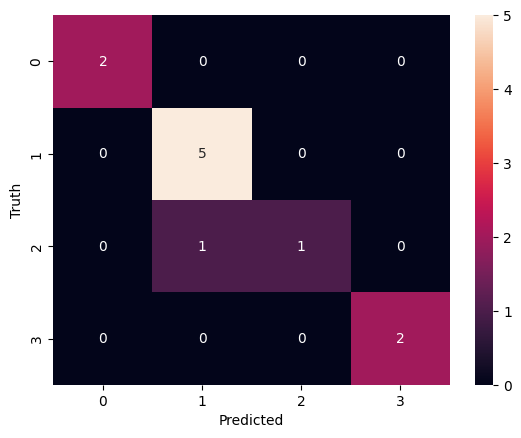

In [86]:
sns.heatmap(cm2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [87]:
print(classification_report(y_test,predict2))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.83      1.00      0.91         5
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2

    accuracy                           0.91        11
   macro avg       0.96      0.88      0.89        11
weighted avg       0.92      0.91      0.90        11



In [88]:
accuracy_2 = round(accuracy_score(y_test,predict2),4)
precision_2 = round(precision_score(y_test,predict2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,predict2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,predict2, average = 'macro'),4)

In [89]:
print('Accuracy Score  : ', accuracy_2)
print('Precision Score : ', precision_2)
print('Recall Score    : ', recall_2)
print('f1-Score        : ', f1_2)

Accuracy Score  :  0.9091
Precision Score :  0.9583
Recall Score    :  0.875
f1-Score        :  0.8939


#Random Forest Classifier

In [90]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict3=rf.predict(X_test)

In [91]:
predict3

array([0, 1, 0, 1, 2, 1, 3, 1, 1, 3, 2])

In [92]:
accuracy_3 = accuracy_score(y_test,predict3)
accuracy_3

1.0

In [93]:
cm3 = confusion_matrix(y_test,predict3)
cm3

array([[2, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 2]])

Text(50.722222222222214, 0.5, 'Truth')

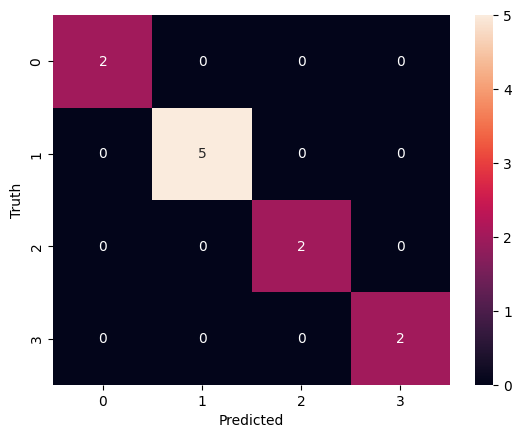

In [94]:
sns.heatmap(cm3,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [95]:
print(classification_report(y_test,predict3))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [96]:
accuracy_3 = round(accuracy_score(y_test,predict3),4)
precision_3 = round(precision_score(y_test,predict3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,predict3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,predict3, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


#Naive-Bayes Classifier


In [97]:
nb=MultinomialNB()
nb.fit(X_train,y_train)
predict4=nb.predict(X_test)

In [98]:
accuracy_4 = accuracy_score(y_test,predict4)
accuracy_4

0.9090909090909091

In [99]:
cm4=confusion_matrix(y_test,predict4)
cm4

array([[2, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 2]])

Text(50.722222222222214, 0.5, 'Truth')

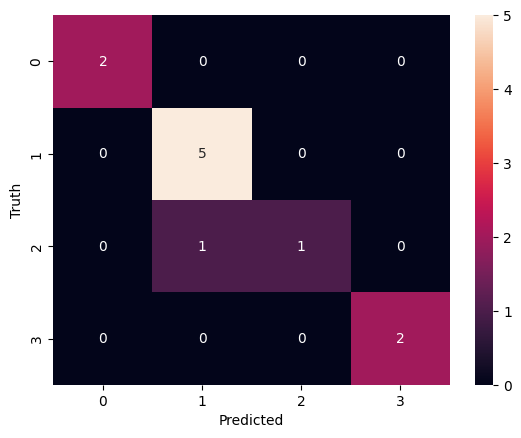

In [100]:
sns.heatmap(cm4,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [101]:
print(classification_report(y_test,predict4))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.83      1.00      0.91         5
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2

    accuracy                           0.91        11
   macro avg       0.96      0.88      0.89        11
weighted avg       0.92      0.91      0.90        11



In [102]:
accuracy_4 = round(accuracy_score(y_test,predict4),4)
precision_4 = round(precision_score(y_test,predict4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,predict4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,predict4, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)

Accuracy Score  :  0.9091
Precision Score :  0.9583
Recall Score    :  0.875
f1-Score        :  0.8939


# Decision Tree Classifier


In [103]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
predict5=dt.predict(X_test)

In [104]:
accuracy_5 = accuracy_score(y_test,predict5)
accuracy_5

0.6363636363636364

In [105]:
cm5=confusion_matrix(y_test,predict5)
cm5

array([[2, 0, 0, 0],
       [3, 2, 0, 0],
       [1, 0, 1, 0],
       [0, 0, 0, 2]])

Text(50.722222222222214, 0.5, 'Truth')

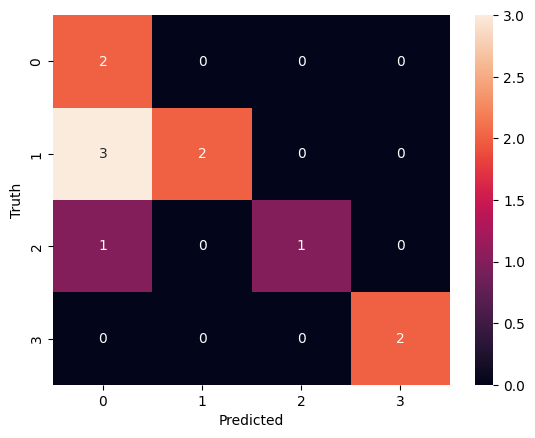

In [106]:
sns.heatmap(cm5,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [107]:
print(classification_report(y_test,predict5))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       1.00      0.40      0.57         5
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2

    accuracy                           0.64        11
   macro avg       0.83      0.72      0.68        11
weighted avg       0.88      0.64      0.65        11



In [108]:
accuracy_5 = round(accuracy_score(y_test,predict5),4)
precision_5 = round(precision_score(y_test,predict5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,predict5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,predict5, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)

Accuracy Score  :  0.6364
Precision Score :  0.8333
Recall Score    :  0.725
f1-Score        :  0.6845


#AdaBoost Classifier


In [109]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
predict6=ab.predict(X_test)

In [110]:
accuracy_6 = accuracy_score(y_test,predict6)
accuracy_6

0.9090909090909091

In [111]:
cm6 = confusion_matrix(y_test,predict6)
cm6

array([[2, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 2]])

Text(50.722222222222214, 0.5, 'Truth')

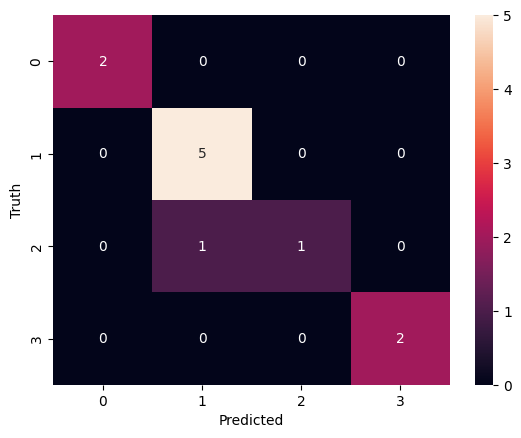

In [112]:
sns.heatmap(cm6,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [113]:
print(classification_report(y_test,predict6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.83      1.00      0.91         5
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2

    accuracy                           0.91        11
   macro avg       0.96      0.88      0.89        11
weighted avg       0.92      0.91      0.90        11



In [114]:
accuracy_6 = round(accuracy_score(y_test,predict6),4)
precision_6 = round(precision_score(y_test,predict6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,predict6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,predict6, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)

Accuracy Score  :  0.9091
Precision Score :  0.9583
Recall Score    :  0.875
f1-Score        :  0.8939


# GradientBoosting Classifier


In [115]:
gd = GradientBoostingClassifier()
gd.fit(X_train,y_train)
predict7 = gd.predict(X_test)

In [116]:
accuracy_7 = accuracy_score(y_test,predict7)
accuracy_7

1.0

In [117]:
cm7 = confusion_matrix(y_test,predict7)
cm7

array([[2, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 2]])

Text(50.722222222222214, 0.5, 'Truth')

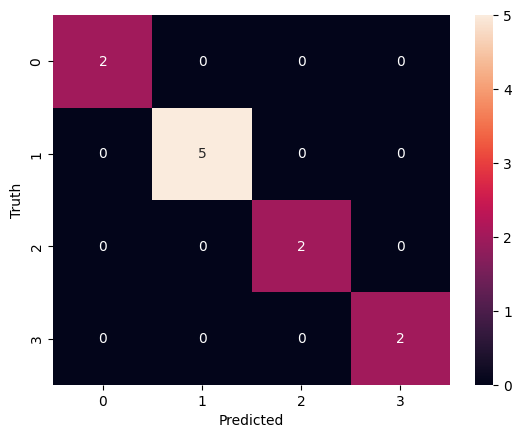

In [118]:
sns.heatmap(cm7,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [119]:
print(classification_report(y_test,predict7))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [120]:
accuracy_7 = round(accuracy_score(y_test,predict7),4)
precision_7 = round(precision_score(y_test,predict7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,predict7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,predict7, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


#XGBoost Classifier

In [121]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
predict8 = xg.predict(X_test)

In [122]:
accuracy_8 = accuracy_score(y_test,predict8)
accuracy_8

1.0

In [123]:
cm8 = confusion_matrix(y_test,predict8)
cm8

array([[2, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 2]])

Text(50.722222222222214, 0.5, 'Truth')

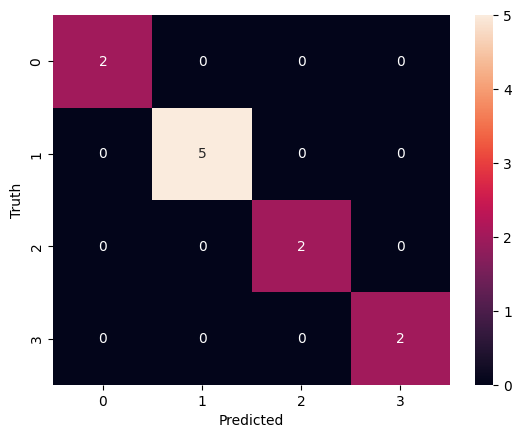

In [124]:
sns.heatmap(cm8,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [125]:
print(classification_report(y_test,predict8))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [126]:
accuracy_8 = round(accuracy_score(y_test,predict8),4)
precision_8 = round(precision_score(y_test,predict8,average = 'macro'),4)
recall_8 = round(recall_score(y_test,predict8, average = 'macro'),4)
f1_8 = round(f1_score(y_test,predict8, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_8)
print('Precision Score : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_8)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


#LGBM-Boosting Classifier


In [127]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
predict9 = lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 516
[LightGBM] [Info] Number of data points in the train set: 42, number of used features: 52
[LightGBM] [Info] Start training from score -1.658228
[LightGBM] [Info] Start training from score -0.965081
[LightGBM] [Info] Start training from score -1.540445
[LightGBM] [Info] Start training from score -1.540445
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [128]:
accuracy_9 = accuracy_score(y_test,predict9)
accuracy_9

0.9090909090909091

In [129]:
cm9 = confusion_matrix(y_test,predict9)
cm9

array([[2, 0, 0, 0],
       [0, 4, 1, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 2]])

In [130]:
print(classification_report(y_test,predict9))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.80      0.89         5
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2

    accuracy                           0.91        11
   macro avg       0.92      0.95      0.92        11
weighted avg       0.94      0.91      0.91        11



In [131]:
accuracy_9 = round(accuracy_score(y_test,predict9),4)
precision_9 = round(precision_score(y_test,predict9,average = 'macro'),4)
recall_9 = round(recall_score(y_test,predict9, average = 'macro'),4)
f1_9 = round(f1_score(y_test,predict9, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_9)
print('Precision Score : ', precision_9)
print('Recall Score    : ', recall_9)
print('f1-Score        : ', f1_9)

Accuracy Score  :  0.9091
Precision Score :  0.9167
Recall Score    :  0.95
f1-Score        :  0.9222


In [132]:
table = {'Classifier' : ['Logistic Regression','SVM Classifier','Random Forest Classifier', 'Naive-Bayes Classifier','Decision Tree Classifier','AdaBoost Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier'], 'Accuracy' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8, accuracy_9], 'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_8, precision_9], 'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8, recall_9], 'F1_Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8, f1_9]}
table = pd.DataFrame(table)
table.sort_values(["Accuracy"],inplace = True, ignore_index=True)
table

,Classifier,Accuracy,Precision Score,Recall Score,F1_Score
0,Decision Tree Classifier,0.6364,0.8333,0.725,0.6845
1,Logistic Regression,0.9091,0.9583,0.875,0.8939
2,SVM Classifier,0.9091,0.9583,0.875,0.8939
3,Naive-Bayes Classifier,0.9091,0.9583,0.875,0.8939
4,AdaBoost Classifier,0.9091,0.9583,0.875,0.8939
5,Light Gradient Boosting Classifier,0.9091,0.9167,0.950,0.9222
6,Random Forest Classifier,1.0000,1.0000,1.000,1.0000
7,Gradient Boosting Classifier,1.0000,1.0000,1.000,1.0000
8,Xtreme Gradient Boosting Classifier,1.0000,1.0000,1.000,1.0000


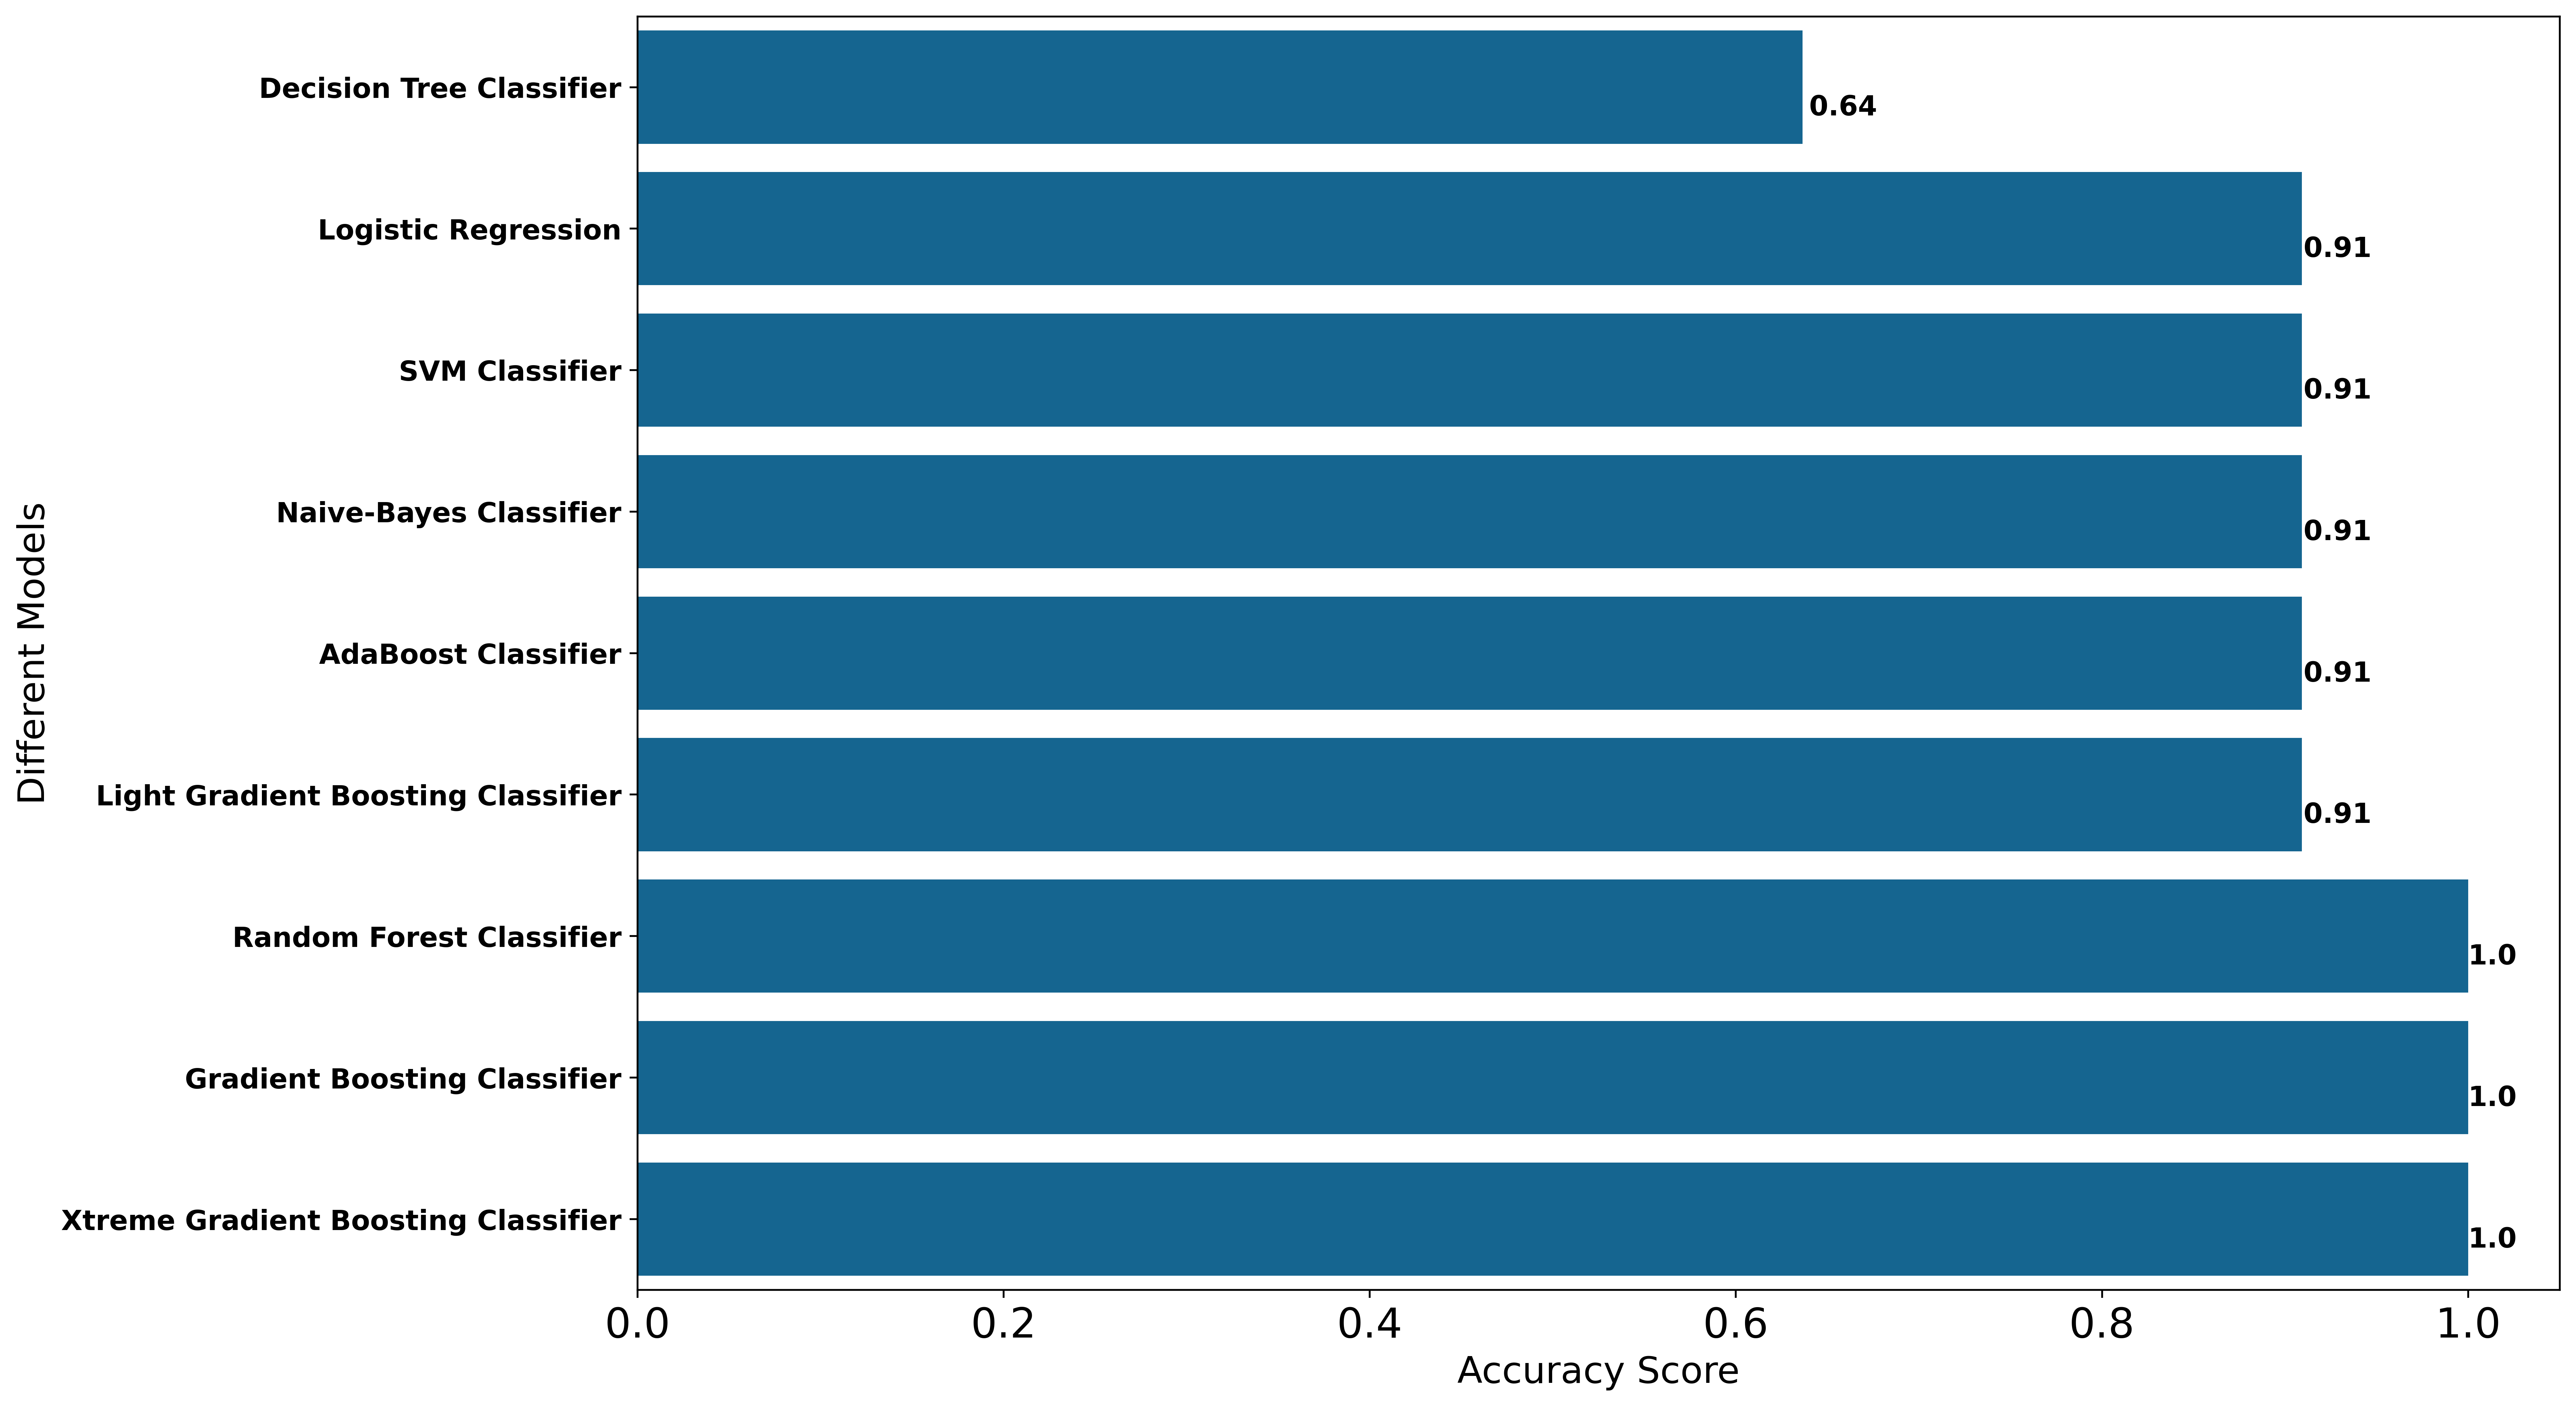

In [133]:
f,axe = plt.subplots(figsize=(15,10),dpi=500)
sns.barplot(x='Accuracy', y='Classifier', data=table, ax = axe)
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('Different Models', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=18)

for i, v in enumerate(np.round(table.Accuracy.values,2)):
    axe.text(v + 0, i + .2, str(v),
            color = 'black', fontweight = 'bold', fontsize= 12)

plt.show()

In [134]:
import joblib

In [135]:
joblib.dump(rf, 'RF_model.pkl')

['RF_model.pkl']

In [137]:
from google.colab import files
files.download("RF_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [138]:
joblib.dump(word_vectorizer, 'vector1.pkl')

['vector1.pkl']

In [139]:
from google.colab import files
files.download("vector1.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>